# 202021周 检查排课率

In [1]:
import sys
sys.path.append("../QkidsAutomation")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
week = 202022

In [5]:
teachers = pd.read_pickle(f"/home/coffee/QkidsAutomation/output/{week}/accident.pkl")
info = pd.read_pickle(f"/home/coffee/QkidsAutomation/output/{week}/teacher.pkl")

## 老师是否有排课

In [6]:
fresh_teachers = info.fresh == 1
fresh_teachers = fresh_teachers.loc[fresh_teachers].index
fresh_teacher_cnt = len(fresh_teachers)
print(f"总共有{len(info)}个老师，其中新老师{fresh_teacher_cnt}个({fresh_teacher_cnt/len(info)})")

总共有6674个老师，其中新老师1768个(0.2649086005394067)


In [7]:
appiont_teacher_cnt = (teachers.appoint > 0).sum()
print(f"总共有{appiont_teacher_cnt}个老师排了课，有{len(teachers)}个老师排了课或者排了standby")

总共有4422个老师排了课，有15854个老师排了课或者排了standby


In [8]:
c = teachers.appoint>0
fresh_teacher_have_appoint = c.loc[c].index.intersection(fresh_teachers)
f"新老师中有排课的有{len(fresh_teacher_have_appoint)}个"

'新老师中有排课的有498个'

In [9]:
total_appoint_rate = appiont_teacher_cnt / len(info)
fresh_teacher_appoint_rate = len(fresh_teacher_have_appoint) / fresh_teacher_cnt
print(f"如果只看是否有排课这个数据：")
print(f"新老师排课比例{round(fresh_teacher_appoint_rate, 3)}，小于全体老师{ round(total_appoint_rate, 3)}")

如果只看是否有排课这个数据：
新老师排课比例0.282，小于全体老师0.663


## 老师排了多少课

In [10]:
total_appoint = teachers.appoint.sum()
total_standby = teachers.standby.sum()
f"{week}周 总共排了{total_appoint}节课， {total_standby}个standby"

'202022周 总共排了80184.0节课， 10856.0个standby'

In [11]:
fresh_teacher_appoint_cnt = teachers.loc[fresh_teacher_have_appoint, 'appoint'].sum()
f"新老师共排了{fresh_teacher_appoint_cnt}节课，占比{fresh_teacher_appoint_cnt/total_appoint}"

'新老师共排了3384.0节课，占比0.042202933253516914'

# 查看一下老师数的占比

Text(0, 0.5, 'total appointment count')

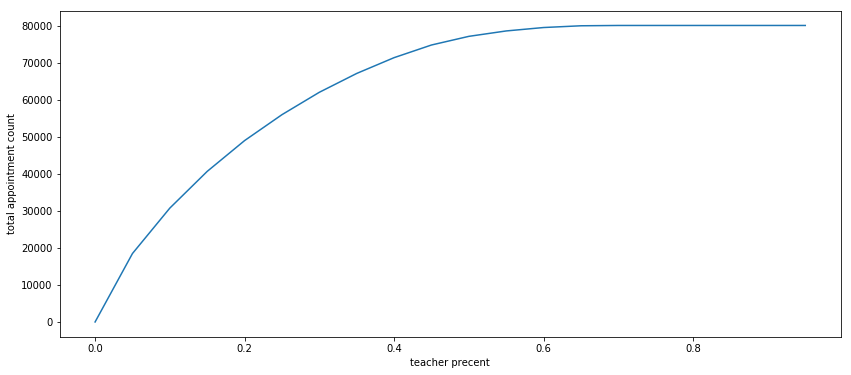

In [12]:
appointed_sort_teachers = teachers.sort_values('appoint', ascending=False)
sumcum = []
for i in np.arange(0,1,0.05):
    index = int(i * len(info))
    cnt = appointed_sort_teachers.iloc[0:index, 0].sum()
    sumcum.append(cnt)
plt.figure(figsize=(14,6))
ax = plt.subplot()
ax.plot( np.arange(0,1,0.05), sumcum)
ax.set_xlabel('teacher precent')
ax.set_ylabel('total appointment count')

上图显示了202022周排的课被多少范围的老师拿走了。图中20%的老师拿走了42000+的课，60%的老师拿走了全部的排课量。

是否有需要均分给80%的老师，或者让新老师多点课？

# 查看什么样得分的老师拿走了课

Text(0, 0.5, 'teacher count')

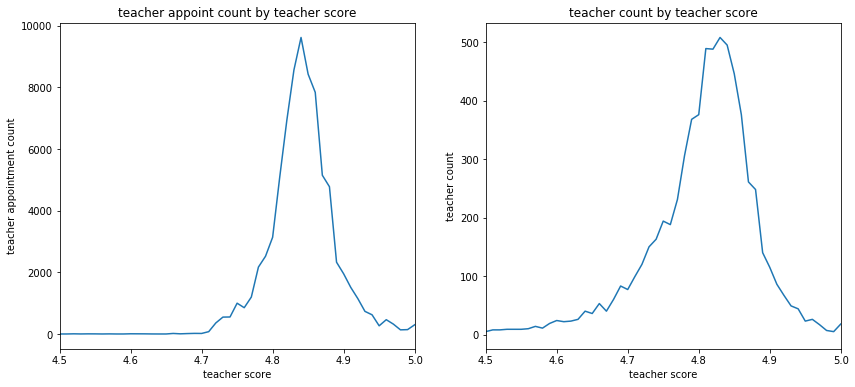

In [15]:
d = teachers.groupby('feedback').agg({'appoint':'sum', 'available':'count'})
plt.figure(figsize=(14,6))
ax1 = plt.subplot(1,2,1)
ax1.plot(d.index, d.appoint.values)
ax1.set_title('teacher appoint count by teacher score')
ax1.set_xlim(4.5,5)
ax1.set_ylabel('teacher appointment count')
ax1.set_xlabel('teacher score')
ax2 = plt.subplot(1,2,2)
ax2.plot(d.index, d.available.values)
ax2.set_title('teacher count by teacher score')
ax2.set_xlim(4.5,5)
ax2.set_xlabel('teacher score')
ax2.set_ylabel('teacher count')

上图中：

左图表示排课量98%被4.7分以上的老师拿走。

右图表示可用时间90%的都是4.7老师提供的。

In [16]:
from qkids.Models import Lesson

In [17]:
lesson = Lesson()

In [18]:
c = lesson._df.course.isin([1,2,3,4,5,6,7,8,9,10,11,12,14,15,42])
available_chapters =  lesson._df.loc[c].chapter.unique()

In [21]:
chapters = pd.read_pickle('/home/coffee/QkidsAutomation/cache/chapter.pkl')
core = chapters.index.intersection(teachers.index)
chapters = chapters.loc[core, available_chapters]

# 老师能力分布

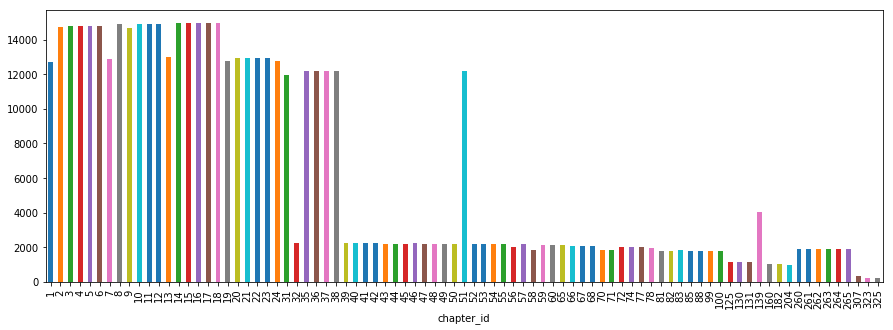

In [22]:
(chapters > 0).sum().sort_index().plot(figsize=(15,5), kind='bar')

# 老师倾向排课的能力分布

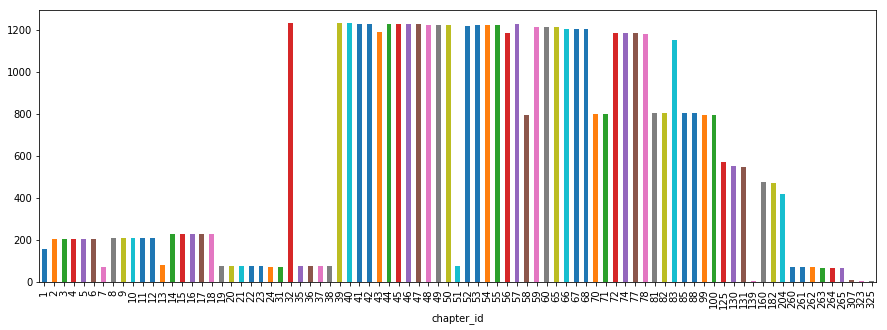

In [23]:
(chapters == 2).sum().sort_index().plot(figsize=(15,5), kind='bar')

# 老师score分布

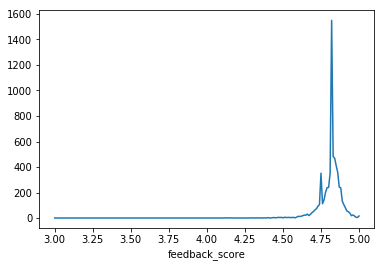

In [25]:
info.groupby('feedback_score').count().iloc[:,1].plot()

In [26]:
info.feedback_score.describe()

count    6674.000000
mean        4.811212
std         0.078899
min         3.000000
25%         4.790000
50%         4.820000
75%         4.850000
max         5.000000
Name: feedback_score, dtype: float64